<a href="https://colab.research.google.com/github/natdebandi/hate_speech_ar/blob/main/3_GPT_evaluate_bin_finetuning_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP final - reconocimiento de discursos discriminatorios en Twitter

## (3 )Finetuning de GPT 3 (gpt-3.5-turbo-0125) para clasificación binaria

Esta notebook se usa para recuperar los batch de GPT y evaluarlos en relación a los datos de test

**Natalia Dedandi**





La documentación de la API se encuentra aqui:

https://platform.openai.com/docs/api-reference/introduction



In [1]:
pip install openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 360.7/360.7 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 1.9 MB/s eta 0:00:00


In [2]:
!pip install datasets seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.1/316.1 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.5 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.6.1
    Uninstalling fsspec-2024.6.1:
      Successfully uninstalled fsspec-2024.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requir

In [4]:
import json
from openai import OpenAI
import os
from google.colab import userdata
#seteo la KEY
os.environ['OPENAI_API_KEY'] = userdata.get('openIA_key')




In [5]:
#creo el cliente OPENAI con mi usuario y proyecto
client = OpenAI(
  organization='org-1uHjwiaB3OlPzoxfVzhqOSzs',
  project='proj_2fII7izwVGgYaERNNKhhMx4l',
)


Id del batch
BATCH ID (finetuning binario GPT 3.5): batch_271qia5twF7qcZNp5AqG9T31




In [6]:
batch_job = client.batches.retrieve('batch_271qia5twF7qcZNp5AqG9T31')
status = batch_job.status
status

'completed'

In [7]:
batch_job

Batch(id='batch_271qia5twF7qcZNp5AqG9T31', completion_window='24h', created_at=1722807906, endpoint='/v1/chat/completions', input_file_id='file-dTTsUROQ8UerWJhLFxRdIcNr', object='batch', status='completed', cancelled_at=None, cancelling_at=None, completed_at=1722810055, error_file_id=None, errors=None, expired_at=None, expires_at=1722894306, failed_at=None, finalizing_at=1722809332, in_progress_at=1722807912, metadata={'description': 'nightly eval job'}, output_file_id='file-fdh5xZn02qgNhdkmj3QthxtE', request_counts=BatchRequestCounts(completed=11343, failed=0, total=11343))

In [8]:
if status == "completed":

	output_file_id = batch_job.output_file_id
	# We should check that there are succesfull results
	# It could be the case that all responses are errors.
	if output_file_id:
		outputs = client.files.content(output_file_id).content
		result_file_name = "outputs.jsonl"

		with open(result_file_name, 'wb') as file:
		    file.write(outputs)

In [9]:
import pandas as pd


data_results = []
with open(result_file_name, 'r') as file:
  for line in file:
      output = json.loads(line.strip())
      id=output["custom_id"]
      sentiment= output["response"]["body"]["choices"][0]["message"]["content"]
      data_results.append({'id': id, 'sentiment_gpt': sentiment})
      gpt_response = output["response"]["body"]["choices"][0]["message"]["content"]
      #print(gpt_response)

df_results = pd.DataFrame(data_results)

In [10]:
df_results[0:10]

,id,sentiment_gpt
0,397703,not hateful
1,397704,not hateful
2,397705,not hateful
3,397706,not hateful
4,397707,not hateful
5,397708,not hateful
6,397709,not hateful
7,397710,not hateful
8,397711,not hateful
9,397712,not hateful


In [11]:
df_results["id"] = pd.to_numeric(df_results["id"])

In [ ]:
#df_results.to_csv('outputs_bin_1.csv')

In [12]:
df_results.groupby(['sentiment_gpt']).size()

,0
sentiment_gpt,
hateful,1567
ierno es una mierda.,1
not hateful,9775


In [13]:
from datasets import load_dataset
import pandas as pd

ds1 = load_dataset("piuba-bigdata/contextualized_hate_speech")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/36420 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/11343 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/9106 [00:00<?, ? examples/s]

In [14]:
df_test = pd.DataFrame(ds1['test'])
df_test[1:10]

,id,title,text,context_tweet,HATEFUL,body,CALLS,WOMEN,LGBTI,RACISM,CLASS,POLITICS,DISABLED,APPEARANCE,CRIMINAL
1,397704,Mora Godoy cierra su escuela de tango y remata...,@usuario Faltó que se enganchó al hijo de sofo...,Mora Godoy cierra su escuela de tango y remata...,1,Puede marcar con justeza la fecha de inicio de...,0,1,0,0,0,0,0,0,0
2,397705,Mora Godoy cierra su escuela de tango y remata...,"@usuario y bue, que le vaya a llorar a Cristin...",Mora Godoy cierra su escuela de tango y remata...,0,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,0,0,0,0,0
3,397706,Mora Godoy cierra su escuela de tango y remata...,@usuario @usuario Jodete. Macri te hizo conoce...,Mora Godoy cierra su escuela de tango y remata...,0,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,0,0,0,0,0
4,397707,Mora Godoy cierra su escuela de tango y remata...,"@usuario Que se joda, es su gobierno el que el...",Mora Godoy cierra su escuela de tango y remata...,0,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,0,0,0,0,0
5,397708,Mora Godoy cierra su escuela de tango y remata...,"@usuario Jajaajajajaaja que lástima!!! Anda, b...",Mora Godoy cierra su escuela de tango y remata...,0,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,0,0,0,0,0
6,397709,Mora Godoy cierra su escuela de tango y remata...,@usuario Que se joda,Mora Godoy cierra su escuela de tango y remata...,0,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,0,0,0,0,0
7,397710,Mora Godoy cierra su escuela de tango y remata...,@usuario SEGUI VOTANDO AL PERONISMO PELOTUDA,Mora Godoy cierra su escuela de tango y remata...,0,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,0,0,0,0,0
8,397711,Mora Godoy cierra su escuela de tango y remata...,@usuario Paaaaaaaaaaaaabreeeee!_shoro😭😭🤧,Mora Godoy cierra su escuela de tango y remata...,0,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,0,0,0,0,0
9,397712,Mora Godoy cierra su escuela de tango y remata...,@usuario TUGO,Mora Godoy cierra su escuela de tango y remata...,0,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,0,0,0,0,0


In [15]:
#junto los dos dataframes
df_hateful=df_test.merge(df_results, on='id', how='left')

In [16]:
df_hateful[0:10]

,id,title,text,context_tweet,HATEFUL,body,CALLS,WOMEN,LGBTI,RACISM,CLASS,POLITICS,DISABLED,APPEARANCE,CRIMINAL,sentiment_gpt
0,397703,Mora Godoy cierra su escuela de tango y remata...,@usuario Ojalá se funda y cague de hambre,Mora Godoy cierra su escuela de tango y remata...,0,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,0,0,0,0,0,not hateful
1,397704,Mora Godoy cierra su escuela de tango y remata...,@usuario Faltó que se enganchó al hijo de sofo...,Mora Godoy cierra su escuela de tango y remata...,1,Puede marcar con justeza la fecha de inicio de...,0,1,0,0,0,0,0,0,0,not hateful
2,397705,Mora Godoy cierra su escuela de tango y remata...,"@usuario y bue, que le vaya a llorar a Cristin...",Mora Godoy cierra su escuela de tango y remata...,0,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,0,0,0,0,0,not hateful
3,397706,Mora Godoy cierra su escuela de tango y remata...,@usuario @usuario Jodete. Macri te hizo conoce...,Mora Godoy cierra su escuela de tango y remata...,0,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,0,0,0,0,0,not hateful
4,397707,Mora Godoy cierra su escuela de tango y remata...,"@usuario Que se joda, es su gobierno el que el...",Mora Godoy cierra su escuela de tango y remata...,0,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,0,0,0,0,0,not hateful
5,397708,Mora Godoy cierra su escuela de tango y remata...,"@usuario Jajaajajajaaja que lástima!!! Anda, b...",Mora Godoy cierra su escuela de tango y remata...,0,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,0,0,0,0,0,not hateful
6,397709,Mora Godoy cierra su escuela de tango y remata...,@usuario Que se joda,Mora Godoy cierra su escuela de tango y remata...,0,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,0,0,0,0,0,not hateful
7,397710,Mora Godoy cierra su escuela de tango y remata...,@usuario SEGUI VOTANDO AL PERONISMO PELOTUDA,Mora Godoy cierra su escuela de tango y remata...,0,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,0,0,0,0,0,not hateful
8,397711,Mora Godoy cierra su escuela de tango y remata...,@usuario Paaaaaaaaaaaaabreeeee!_shoro😭😭🤧,Mora Godoy cierra su escuela de tango y remata...,0,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,0,0,0,0,0,not hateful
9,397712,Mora Godoy cierra su escuela de tango y remata...,@usuario TUGO,Mora Godoy cierra su escuela de tango y remata...,0,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,0,0,0,0,0,not hateful


In [17]:
## ajustar los valores y crear una variable binaria entera 1 y 0
df_hateful['sentiment_bin'] = df_hateful['sentiment_gpt'].apply(lambda x: 1 if (x=='hateful' or x=='Hateful') else 0)
df_hateful.groupby(['sentiment_bin']).size()

,0
sentiment_bin,
0,9776
1,1567


<ipython-input-18-4d697c4524f7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df_hateful, x='HATEFUL', y='sentiment_bin', inner='stick', palette='Dark2')


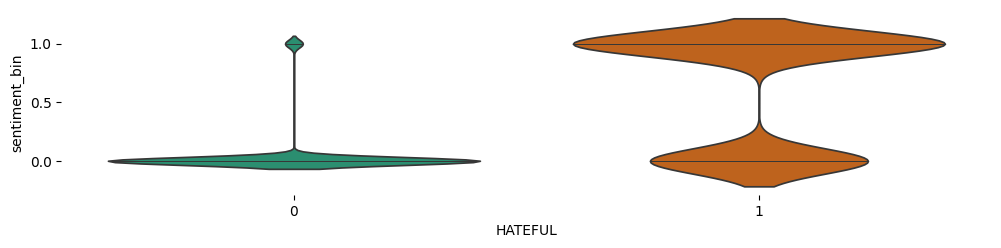

In [18]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_hateful['sentiment_bin'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_hateful, x='HATEFUL', y='sentiment_bin', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def compare_model_predictions(y_true, y_pred, problem_type='classification'):
    metrics = {}

    if problem_type == 'classification':
        metrics['Accuracy'] = accuracy_score(y_true, y_pred)
        metrics['Precision'] = precision_score(y_true, y_pred, average='weighted')
        metrics['Recall'] = recall_score(y_true, y_pred, average='weighted')
        metrics['f1'] = f1_score(y_true, y_pred, average='weighted')
        metrics['AUC'] = roc_auc_score(y_true, y_pred, average='weighted')
        print(metrics)

In [ ]:
metrics=compare_model_predictions(df_hateful['HATEFUL'],df_hateful['sentiment_bin'])

{'Accuracy': 0.903200211584237, 'Precision': 0.8989615261500338, 'Recall': 0.903200211584237, 'f1': 0.900467192626422, 'AUC': 0.7925156005871927}


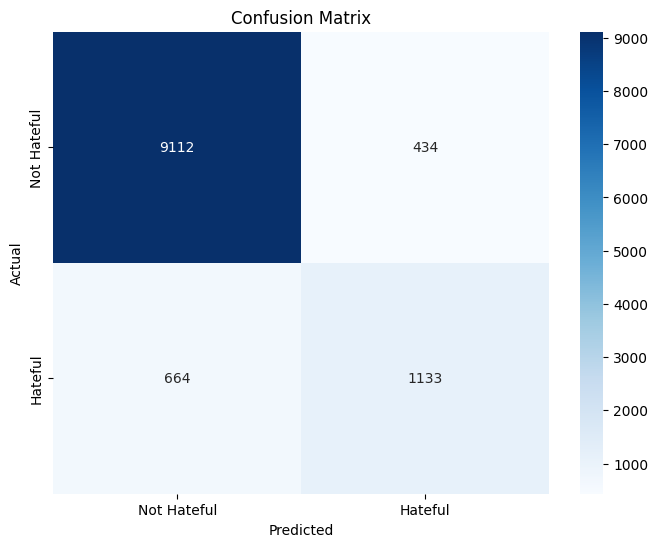

In [20]:
# prompt: confusion matrix plot for df_hateful['HATEFUL'],df_hateful['sentiment_bin']

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
cm = confusion_matrix(df_hateful['HATEFUL'], df_hateful['sentiment_bin'])

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Hateful', 'Hateful'],
            yticklabels=['Not Hateful', 'Hateful'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
